In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/R_Data')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/R_Data"))
file_count = len(files)
#print(file_count)

['Malignant cases', 'Bengin cases', 'Split_data_inception_V3', 'Inception_v3.hdf5', 'Split_data_CNN']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/R_Data'
base_dir = '/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [ ]:
#Under train folder create two folders 

train_cloud_dir = os.path.join(train_dir, 'Bengin cases')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'Malignant cases')
os.mkdir(train_foggy_dir)

In [ ]:
#Under validation folder create five folders 

validation_cloud_dir = os.path.join(validation_dir, 'Bengin cases')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'Malignant cases')
os.mkdir(validation_foggy_dir)

In [ ]:
import os
import random
from shutil import copyfile

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
BENGIN_SOURCE_DIR = '/content/drive/MyDrive/R_Data/Bengin cases/'
TRAINING_BENGIN_DIR = '/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/train/Bengin cases/'
VALID_BENGIN_DIR = '/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/validation/Bengin cases/'

MALIGNANT_SOURCE_DIR = '/content/drive/MyDrive/R_Data/Malignant cases/'
TRAINING_MALIGNANT_DIR = '/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/train/Malignant cases/'
VALID_MALIGNANT_DIR = '/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/validation/Malignant cases/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .80

split_data(BENGIN_SOURCE_DIR, TRAINING_BENGIN_DIR, VALID_BENGIN_DIR, split_size)
split_data(MALIGNANT_SOURCE_DIR, TRAINING_MALIGNANT_DIR, VALID_MALIGNANT_DIR, split_size)

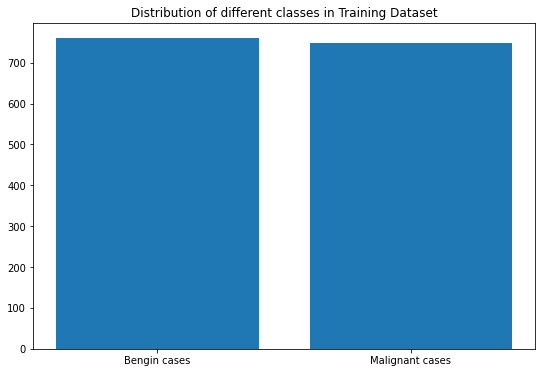

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Bengin cases', 'Malignant cases']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['Bengin cases', 'Malignant cases']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/train/'+i+'/'))))

Training Bengin cases images are: 760
Training Malignant cases images are: 748


In [ ]:
for i in ['Bengin cases', 'Malignant cases']:
    print('Testing {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/validation/'+i+'/'))))

Testing Bengin cases images are: 191
Testing Malignant cases images are: 188


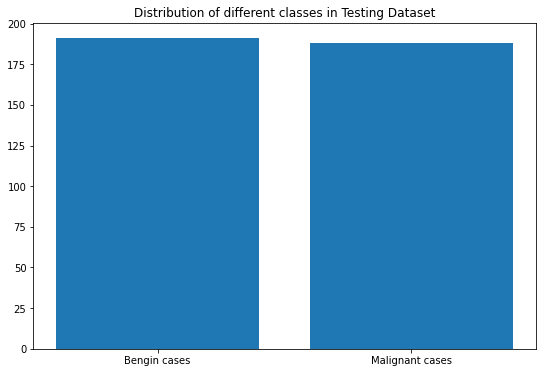

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Bengin cases', 'Malignant cases']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.show()

In [ ]:
!pip install tensorflow==2.7.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import sequential
from tensorflow.keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=8,
                                   zoom_range=0.15,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.10,
                                   horizontal_flip=True,
                                   brightness_range=[0.8,1.2],
                                   channel_shift_range=0.15,
                                   fill_mode="nearest")

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/train',target_size=(299,299),batch_size=32,class_mode='binary')

x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/R_Data/Split_data_inception_V3_1/validation',target_size=(299,299),batch_size=32,class_mode='binary')

print(x_train.class_indices)
print(x_test.class_indices)

Found 876 images belonging to 2 classes.
Found 221 images belonging to 2 classes.
{'Bengin cases': 0, 'Malignant cases': 1}
{'Bengin cases': 0, 'Malignant cases': 1}


In [ ]:
import tensorflow.python.keras.applications

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from keras.models import Sequential

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                    

In [ ]:
base_model=tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(299,299,3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
for layer in base_model.layers:
    layer.trainable=False

87924736/87910968 [==============================] - 5s 0us/step


In [ ]:
x=layers.Flatten()(base_model.output)
x=layers.Dense(512,activation='relu')(x)

x=layers.Dropout(0.5)(x)
x=layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.models.Model(base_model.input,x)



In [ ]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
TRAIN_COUNT =len(x_train.filepaths)
TEST_COUNT=len(x_test.filepaths)
TRAIN_STEPS_PER_EPOCH= round(TRAIN_COUNT/32)
VAL_STEPS_PER_EPOCH = round(TEST_COUNT/32)

In [ ]:
print(f"TRAIN_STEPS_PER_EPOCH:{TRAIN_STEPS_PER_EPOCH}")
print(f"VAL_STEPS_PER_EPOCH:{VAL_STEPS_PER_EPOCH}")

TRAIN_STEPS_PER_EPOCH:27
VAL_STEPS_PER_EPOCH:7


In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping,ModelCheckpoint
EARLY_STOP_PATIENCE =5

In [ ]:
cb_early_stopper =EarlyStopping(monitor='val_losss',patience=EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath='Inception_v3.hdf5',monitor='val_loss',save_best_only=True,mode='auto')
callbacks=[cb_checkpointer,cb_early_stopper]
history=model.fit_generator(x_train,steps_per_epoch=TRAIN_STEPS_PER_EPOCH,epochs=20,
                            validation_data=x_test,validation_steps=VAL_STEPS_PER_EPOCH)

Epoch 1/20
27/27 [==============================] - 42s 1s/step - loss: 12.6191 - accuracy: 0.7583 - val_loss: 8.6226 - val_accuracy: 0.8462
Epoch 2/20
27/27 [==============================] - 27s 1s/step - loss: 8.4766 - accuracy: 0.8092 - val_loss: 4.0997 - val_accuracy: 0.8281
Epoch 3/20
27/27 [==============================] - 26s 953ms/step - loss: 2.0870 - accuracy: 0.8152 - val_loss: 0.6095 - val_accuracy: 0.8824
Epoch 4/20
27/27 [==============================] - 26s 947ms/step - loss: 0.5573 - accuracy: 0.8436 - val_loss: 0.2740 - val_accuracy: 0.8869
Epoch 5/20
27/27 [==============================] - 26s 950ms/step - loss: 0.3136 - accuracy: 0.8709 - val_loss: 0.2731 - val_accuracy: 0.8778
Epoch 6/20
27/27 [==============================] - 26s 956ms/step - loss: 0.2732 - accuracy: 0.8866 - val_loss: 0.2573 - val_accuracy: 0.8869
Epoch 7/20
27/27 [==============================] - 26s 954ms/step - loss: 0.2656 - accuracy: 0.8910 - val_loss: 0.2695 - val_accuracy: 0.8507
Epoc

In [ ]:
model.save("/content/drive/MyDrive/Data_O/OOO/Cancer/Inception_v3.hdf5")

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix


[[32 52]
 [49 88]]
0.5429864253393665


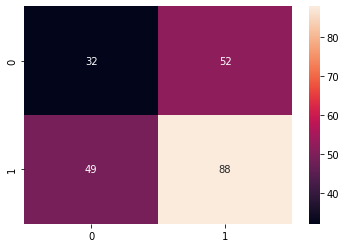

In [ ]:
y_pred=model.predict(x_test)
threshold=0.5
y_pred_threshold=[(1 if val>threshold else 0) for val in y_pred]
y_true=x_test.labels.tolist()
print(confusion_matrix(y_true,y_pred_threshold))
print(accuracy_score(y_true,y_pred_threshold))
sns.heatmap(confusion_matrix(y_true,y_pred_threshold),annot=True)


In [ ]:
y_pred = model.predict(x_test, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
#y_true=x_test.labels.tolist()



print(classification_report(y_true, y_pred_bool))

print(confusion_matrix(y_true, y_pred=y_pred_bool))

7/7 [==============================] - 2s 263ms/step
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        84
           1       0.00      0.00      0.00       137

    accuracy                           0.38       221
   macro avg       0.19      0.50      0.28       221
weighted avg       0.14      0.38      0.21       221

[[ 84   0]
 [137   0]]


In [ ]:
keys=history.history.keys()
print(keys)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


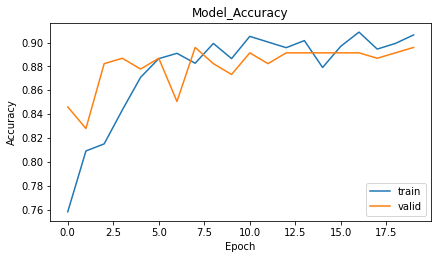

In [ ]:
plt.figure(1,figsize=(15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'])

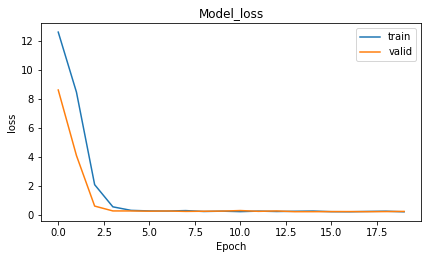

In [ ]:
plt.figure(1,figsize=(15,8))
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])

plt.show()

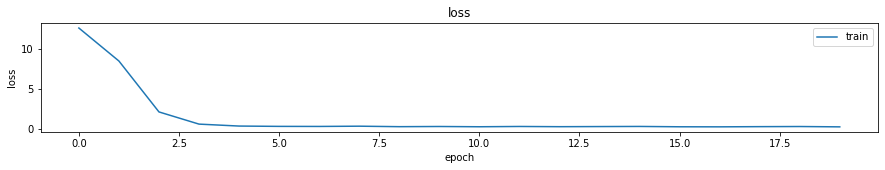

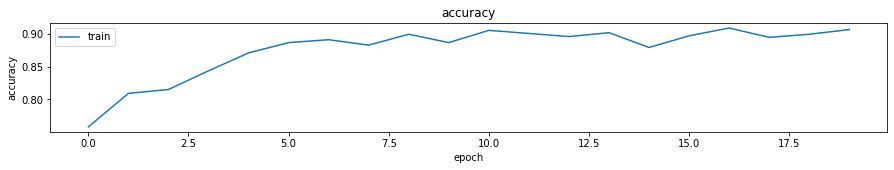

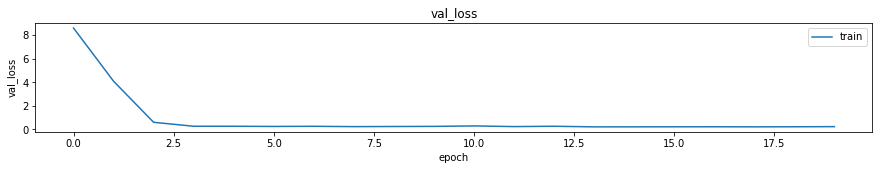

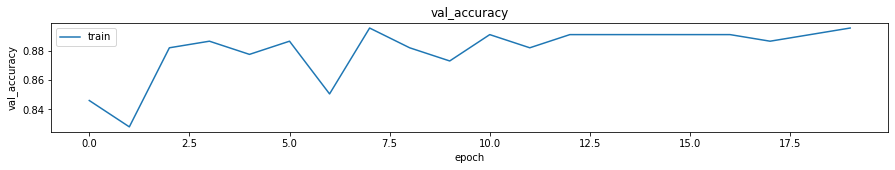

In [ ]:
for key in keys:
  plt.figure(figsize=(15,2))
  plt.plot(history.history[key])
  plt.title(key)
  plt.ylabel(key)
  plt.xlabel('epoch')
  plt.legend(['train','valid'])

plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Data_O/OOO/Cancer/Inception_v3.hdf5')

In [ ]:
from keras.preprocessing import image
import cv2
import numpy as np
import PIL
from PIL import Image

In [ ]:
img = image.load_img('/content/drive/MyDrive/Data_O/OOO/Cancer/Split_data_inception_V3/validation/Malignant cases/Malignant case (170).jpg',target_size=(299,299))

In [ ]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x.shape

(1, 299, 299, 3)

In [ ]:
pred = model.predict(x)
pred

array([[1.]], dtype=float32)

In [ ]:
class_names=["Bengin cases","Malignant cases"]
prediction = class_names[int(pred[0][0])]
print(pred[0][0])
print(prediction)

1.0
Malignant cases


In [ ]:
!pip install pyngrok==4.1.1

In [ ]:
!pip install flask_ngrok
!ngrok authtoken 2L2K2jLowvwGqsOFktpa14xk1Av_5n8dboKu9yH1PkyoiCgx2 #Without "" marks 

from flask_ngrok import run_with_ngrok
from flask import Flask, render_template

In [ ]:
!ls

drive  sample_data


In [ ]:
!pip install --upgrade gevent

In [ ]:
import os

if not os.path.exists('templates'):
  os.makedirs('/content/drive/MyDrive/Webapp/templates')
if not os.path.exists('static'):
  os.makedirs('/content/drive/MyDrive/Webapp/static')

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import os

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask, request, render_template
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

In [ ]:
import cv2
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

In [ ]:
MODEL_PATH = '/content/drive/MyDrive/Data_O/OOO/Cancer/Inception_v3.hdf5'
model = load_model(MODEL_PATH)
#print('Model Loaded. Check http://127.0.0.1:5000/')

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('/content/drive/MyDrive/Data_O/OOO/Cancer/Inception_v3.hdf5')

# Define a Flask app
app = Flask(__name__)

# Define a route for predicting the uploaded images
@app.route('/predict', methods=['POST'])
def predict():
    # Get the uploaded file from the request
    file = request.files['image']
    
    # Load the image and preprocess it
    img = image.load_img(file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Make a prediction
    preds = model.predict(x)
    
    # Get the class label
    label = decode_predictions(preds, top=1)[0][0][1]
    
    # Return the prediction result
    return jsonify({'class': label})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
if __name__ == '__main__':
    app.run()

app = Flask(__name__ ) 
run_with_ngrok(app)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
